# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
'''
There are a few trends that can be observed from the data shown below. For one, temperature appears to 
generally trend higher the closer the latitude is to 0. When latitude goes closer to +60 or -60, the temperature tends
to go down. Another trend that can be noticed is that humidity tends to be higher further north. This is shown in the 
graphs for humidity vs laditude for both the northern and southern hemispheres, where a latitude of about -60 shows low 
humidity, latitudes of around 0 shows somewhat higher humidity, and latitudes closer to 60 tend to be the highest. 
One final trend that can be seen is that generally the further north a city is, the more cloudy it will be. 
One thing to note about this trend, however, is that it is a pretty weak trend, with a low r-value; even looking at 
the scatter plot it looks fairly random.
'''


'\nThere are a few trends that can be observed from the data shown below. For one, temperature appears to \ngenerally trend higher the closer the latitude is to 0. When latitude goes closer to +60 or -60, the temperature tends\nto go down. Another trend that can be noticed is that humidity tends to be higher further north. This is shown in the \ngraphs for humidity vs laditude for both the northern and southern hemispheres, where a latitude of about -60 shows low \nhumidity, latitudes of around 0 shows somewhat higher humidity, and latitudes closer to 60 tend to be the highest. \nOne final trend that can be seen is that generally the further north a city is, the more cloudy it will be. \nOne thing to note about this trend, however, is that it is a pretty weak trend, with a low r-value; even looking at \nthe scatter plot it looks fairly random.\n'

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

636

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
print(weather_api_key)

37b70d4776930464ee4a96e36cd960be


In [5]:
cities_found = []
countries = []
latitudes = []
longitudes = []
city_ID = []
temperatures = []
humidities = []
cloudinesses = []
wind_speeds = []

url = f'http://api.openweathermap.org/data/2.5/weather?q=london&appid={weather_api_key}&units=imperial' 
weather_response = requests.get(url).json()

#print(json.dumps(weather_response, indent=4, sort_keys=True))
weather_response




{'coord': {'lon': -0.13, 'lat': 51.51},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 46.35,
  'feels_like': 41.65,
  'temp_min': 44.01,
  'temp_max': 48.2,
  'pressure': 1014,
  'humidity': 81},
 'visibility': 10000,
 'wind': {'speed': 4.7, 'deg': 180},
 'clouds': {'all': 100},
 'dt': 1608516575,
 'sys': {'type': 1,
  'id': 1414,
  'country': 'GB',
  'sunrise': 1608537843,
  'sunset': 1608566007},
 'timezone': 0,
 'id': 2643743,
 'name': 'London',
 'cod': 200}

In [6]:
for city in cities:
    url = f'http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=imperial' 
    weather_response = requests.get(url).json()
    
    try:
        city_ID.append(weather_response['id'])
        temperatures.append(weather_response['main']['temp'])
        humidities.append(weather_response['main']['humidity'])
        cloudinesses.append(weather_response['clouds']['all'])
        wind_speeds.append(weather_response['wind']['speed'])
        latitudes.append(weather_response['coord']['lat'])
        longitudes.append(weather_response['coord']['lon'])
        cities_found.append(city)
        countries.append(weather_response['sys']['country'])
        print(f'Processing weather data for {city}, city ID: {weather_response["id"]}')
    except:
        print(f'{city} not found...skipping')



  

Processing weather data for itoman, city ID: 1861280
Processing weather data for busselton, city ID: 2075265
Processing weather data for paamiut, city ID: 3421193
Processing weather data for chokurdakh, city ID: 2126123
barentsburg not found...skipping
Processing weather data for ushuaia, city ID: 3833367
Processing weather data for kavieng, city ID: 2094342
Processing weather data for punta arenas, city ID: 3874787
Processing weather data for tazovskiy, city ID: 1489853
Processing weather data for plettenberg bay, city ID: 964712
Processing weather data for clyde river, city ID: 5924351
Processing weather data for torbay, city ID: 6167817
Processing weather data for butaritari, city ID: 2110227
Processing weather data for thompson, city ID: 6165406
Processing weather data for isangel, city ID: 2136825
Processing weather data for luan, city ID: 2659977
Processing weather data for kodiak, city ID: 5866583
Processing weather data for ramshir, city ID: 118805
Processing weather data for s

Processing weather data for salalah, city ID: 286621
Processing weather data for san rafael, city ID: 3836669
Processing weather data for sao filipe, city ID: 3374210
Processing weather data for guadalupe, city ID: 4005492
Processing weather data for kiama, city ID: 2161515
Processing weather data for nikolskoye, city ID: 546105
Processing weather data for denpasar, city ID: 1645528
Processing weather data for saint-philippe, city ID: 935215
Processing weather data for georgetown, city ID: 1735106
amderma not found...skipping
Processing weather data for cherskiy, city ID: 2126199
Processing weather data for lebu, city ID: 3883457
Processing weather data for sisimiut, city ID: 3419842
Processing weather data for usinsk, city ID: 863061
Processing weather data for palana, city ID: 2122262
Processing weather data for moranbah, city ID: 6533368
galiwinku not found...skipping
Processing weather data for baihar, city ID: 1277776
Processing weather data for cabo san lucas, city ID: 3985710
Pr

Processing weather data for haines junction, city ID: 5969025
Processing weather data for sechura, city ID: 3691954
Processing weather data for sycamore, city ID: 4913110
saleaula not found...skipping
Processing weather data for coquimbo, city ID: 3893629
Processing weather data for cidreira, city ID: 3466165
Processing weather data for matara, city ID: 1235846
Processing weather data for ribeira grande, city ID: 3372707
Processing weather data for dondo, city ID: 1024696
Processing weather data for vardo, city ID: 777019
Processing weather data for itarema, city ID: 3393692
Processing weather data for ust-kulom, city ID: 478050
Processing weather data for birjand, city ID: 140463
Processing weather data for hede, city ID: 1808744
Processing weather data for samarai, city ID: 2132606
Processing weather data for mao, city ID: 2514301
Processing weather data for rawson, city ID: 3839307
Processing weather data for notodden, city ID: 3144075
Processing weather data for tuatapere, city ID:

Processing weather data for shimoda, city ID: 1852357
Processing weather data for san jose, city ID: 5392171
Processing weather data for labuhan, city ID: 8079926
Processing weather data for insar, city ID: 556318
Processing weather data for rafsanjan, city ID: 118994
Processing weather data for epe, city ID: 2343252
Processing weather data for gore, city ID: 6201424
Processing weather data for poum, city ID: 2138555
Processing weather data for malakal, city ID: 370737
Processing weather data for jackson, city ID: 5733351
Processing weather data for tamandare, city ID: 3386931
Processing weather data for port hedland, city ID: 2063042
Processing weather data for eregli, city ID: 315498
Processing weather data for mandalgovi, city ID: 2030065
Processing weather data for merauke, city ID: 2082539
Processing weather data for waipawa, city ID: 2206874
Processing weather data for te anau, city ID: 2181625
Processing weather data for ierapetra, city ID: 261814
Processing weather data for san

Processing weather data for zabol, city ID: 1121143
Processing weather data for cayenne, city ID: 3382160
Processing weather data for peleduy, city ID: 2018069
Processing weather data for belmonte, city ID: 3470137
karaul not found...skipping
Processing weather data for viedma, city ID: 3832899
Processing weather data for laguna, city ID: 5364271
Processing weather data for setermoen, city ID: 3139765
Processing weather data for de-kastri, city ID: 2126018
Processing weather data for alghero, city ID: 3183284
Processing weather data for antigonish, city ID: 5886182
Processing weather data for sakakah, city ID: 102527
Processing weather data for san policarpo, city ID: 1688696
Processing weather data for pervomayskoye, city ID: 797213
Processing weather data for boende, city ID: 218680
Processing weather data for majene, city ID: 1636806


In [7]:
len(longitudes)

589

In [8]:
dict_weather = {
    'City': cities_found,
    'City ID' : city_ID,
    'Country' : countries,
    'Latitude' : latitudes,
    'Longitude' : longitudes,
    'Temperature' : temperatures,
    'Humidity' : humidities,
    'Cloudiness' : cloudinesses,
    'Wind Speed' : wind_speeds,
}

weather_data = pd.DataFrame(dict_weather)

weather_data

,City,City ID,Country,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
0,itoman,1861280,JP,26.12,127.67,62.51,63,75,13.87
1,busselton,2075265,AU,-33.65,115.33,70.00,51,0,5.01
2,paamiut,3421193,GL,61.99,-49.67,27.79,97,98,21.14
3,chokurdakh,2126123,RU,70.63,147.92,-19.57,88,76,9.51
4,ushuaia,3833367,AR,-54.80,-68.30,44.60,70,40,24.16
...,...,...,...,...,...,...,...,...,...
584,sakakah,102527,SA,29.97,40.21,50.00,71,0,4.70
585,san policarpo,1688696,PH,12.18,125.51,82.42,83,67,14.18
586,pervomayskoye,797213,RU,43.92,46.71,41.04,81,100,14.27
587,boende,218680,CD,-0.22,20.87,70.14,95,100,2.35


In [9]:
weather_data.to_csv("weather.csv", index=False, header=True)

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame
weather_data.to_csv("weather.csv", index=False, header=True)

In [10]:
weather_data = weather_data[weather_data['Humidity'] <= 100]

In [11]:
weather_data

,City,City ID,Country,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
0,itoman,1861280,JP,26.12,127.67,62.51,63,75,13.87
1,busselton,2075265,AU,-33.65,115.33,70.00,51,0,5.01
2,paamiut,3421193,GL,61.99,-49.67,27.79,97,98,21.14
3,chokurdakh,2126123,RU,70.63,147.92,-19.57,88,76,9.51
4,ushuaia,3833367,AR,-54.80,-68.30,44.60,70,40,24.16
...,...,...,...,...,...,...,...,...,...
584,sakakah,102527,SA,29.97,40.21,50.00,71,0,4.70
585,san policarpo,1688696,PH,12.18,125.51,82.42,83,67,14.18
586,pervomayskoye,797213,RU,43.92,46.71,41.04,81,100,14.27
587,boende,218680,CD,-0.22,20.87,70.14,95,100,2.35


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

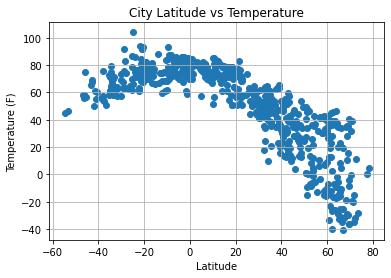

In [12]:
plt.scatter(weather_data['Latitude'], weather_data['Temperature'])
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title('City Latitude vs Temperature')
plt.grid()
plt.savefig('graphs/latitude_vs_temperature.png')
plt.show()

## Latitude vs. Humidity Plot

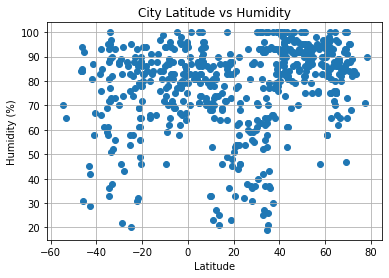

In [13]:
plt.scatter(weather_data['Latitude'], weather_data['Humidity'])
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs Humidity')
plt.grid()
plt.savefig('graphs/latitude_vs_humidity.png')
plt.show()

## Latitude vs. Cloudiness Plot

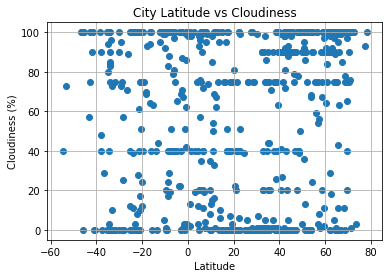

In [14]:
plt.scatter(weather_data['Latitude'], weather_data['Cloudiness'])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs Cloudiness')
plt.grid()
plt.savefig('graphs/latitude_vs_cloudiness.png')
plt.show()

## Latitude vs. Wind Speed Plot

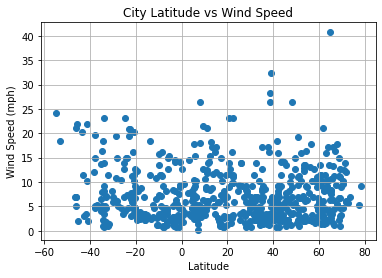

In [15]:
plt.scatter(weather_data['Latitude'], weather_data['Wind Speed'])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs Wind Speed')
plt.grid()
plt.savefig('graphs/latitude_vs_windspeed.png')
plt.show()

## Linear Regression

In [16]:
north_data = weather_data[weather_data['Latitude'] > 0]
south_data = weather_data[weather_data['Latitude'] < 0]



####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is : -0.8473306720049272


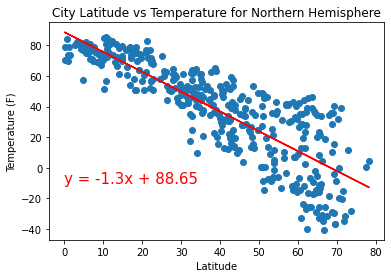

In [17]:
plt.scatter(north_data['Latitude'], north_data['Temperature'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_data['Latitude'], north_data['Temperature'])
regress_values = north_data['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.plot(north_data['Latitude'], regress_values,"r-")
plt.annotate(line_eq,(0,-10),fontsize=15,color="red")
plt.title('City Latitude vs Temperature for Northern Hemisphere')
print(f'The r-value is : {rvalue}')
plt.savefig('graphs/latitude_vs_temp_north.png')
plt.show()

#This linear regression shows the general trend of the relationship between temperature and latitude
# for the Northern hemisphere

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is : 0.5746732231258435


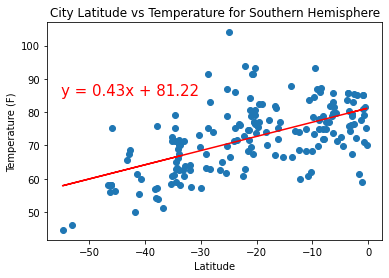

In [18]:
plt.scatter(south_data['Latitude'], south_data['Temperature'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_data['Latitude'], south_data['Temperature'])
regress_values = south_data['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.plot(south_data['Latitude'], regress_values,"r-")
plt.annotate(line_eq,(-55,85),fontsize=15,color="red")
plt.title('City Latitude vs Temperature for Southern Hemisphere')
print(f'The r-value is : {rvalue}')
plt.savefig('graphs/latitude_vs_temp_south.png')
plt.show()

#This linear regression shows the general trend of the relationship between temperature and latitude
# for the Southern hemisphere

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is : 0.2718552055661716


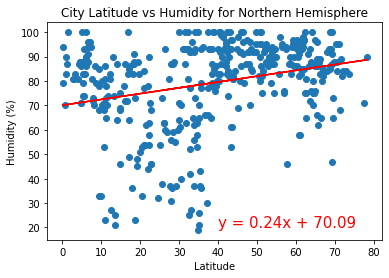

In [26]:
plt.scatter(north_data['Latitude'], north_data['Humidity'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_data['Latitude'], north_data['Humidity'])
regress_values = north_data['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(north_data['Latitude'], regress_values,"r-")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs Humidity for Northern Hemisphere')
print(f'The r-value is : {rvalue}')
plt.savefig('graphs/latitude_vs_humidity_north.png')
plt.show()

#This linear regression shows the general trend of the relationship between Humidity and latitude
# for the Northern hemisphere

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is : 0.22578185441726958


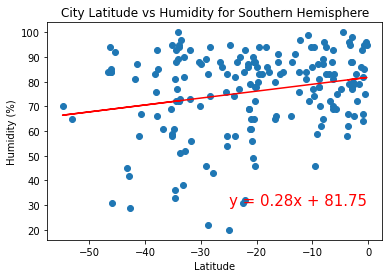

In [20]:
plt.scatter(south_data['Latitude'], south_data['Humidity'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_data['Latitude'], south_data['Humidity'])
regress_values = south_data['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(south_data['Latitude'], regress_values,"r-")
plt.annotate(line_eq,(-25,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs Humidity for Southern Hemisphere')
print(f'The r-value is : {rvalue}')
plt.savefig('graphs/latitude_vs_humidity_south.png')
plt.show()

#This linear regression shows the general trend of the relationship between humidity and latitude
# for the Southern hemisphere

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is : 0.2129620986149154


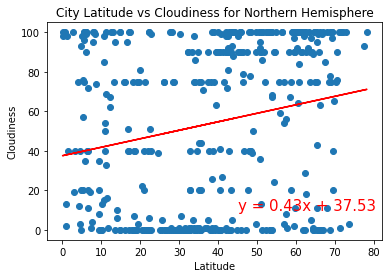

In [21]:
plt.scatter(north_data['Latitude'], north_data['Cloudiness'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_data['Latitude'], north_data['Cloudiness'])
regress_values = north_data['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(north_data['Latitude'], regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('City Latitude vs Cloudiness for Northern Hemisphere')
print(f'The r-value is : {rvalue}')
plt.savefig('graphs/latitude_vs_cloudiness_north.png')
plt.show()

#This linear regression shows the general trend of the relationship between cloudiness and latitude
# for the Northern hemisphere

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is : 0.02375830881676773


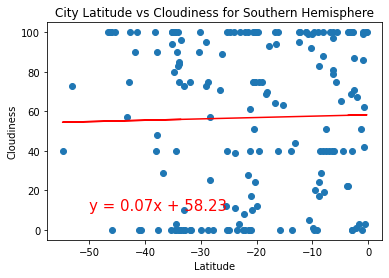

In [22]:
plt.scatter(south_data['Latitude'], south_data['Cloudiness'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_data['Latitude'], south_data['Cloudiness'])
regress_values = south_data['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(south_data['Latitude'], regress_values,"r-")
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('City Latitude vs Cloudiness for Southern Hemisphere')
print(f'The r-value is : {rvalue}')

plt.savefig('graphs/latitude_vs_cloudiness_south.png')
plt.show()

#This linear regression shows the general trend of the relationship between cloudiness and latitude
# for the Southern hemisphere

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is : 0.01746767341452307


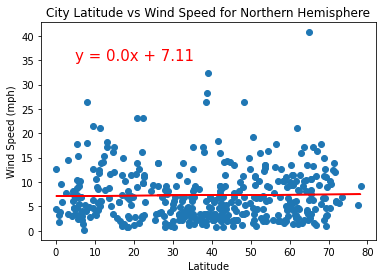

In [23]:
plt.scatter(north_data['Latitude'], north_data['Wind Speed'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_data['Latitude'], north_data['Wind Speed'])
regress_values = north_data['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(north_data['Latitude'], regress_values,"r-")
plt.annotate(line_eq,(5,35),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs Wind Speed for Northern Hemisphere')
print(f'The r-value is : {rvalue}')
plt.savefig('graphs/latitude_vs_windspeed_north.png')
plt.show()

#This linear regression shows the general trend of the relationship between wind speed and latitude
# for the Northern hemisphere

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is : -0.28067284339172066


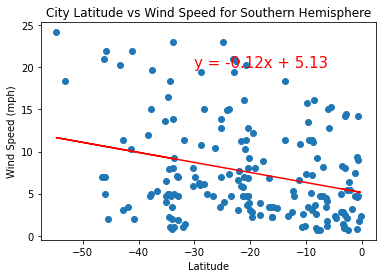

In [28]:
plt.scatter(south_data['Latitude'], south_data['Wind Speed'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_data['Latitude'], south_data['Wind Speed'])
regress_values = south_data['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(south_data['Latitude'], regress_values,"r-")
plt.annotate(line_eq,(-30,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs Wind Speed for Southern Hemisphere')
print(f'The r-value is : {rvalue}')
plt.savefig('graphs/latitude_vs_windspeed_south.png')
plt.show()

#This linear regression shows the general trend of the relationship between wind speed and latitude
# for the Southern hemisphere